#                                     Walmart - Store Sales Forecasting

## 1- Introduction

Walmart, the biggest department store in the US, held a competition on Kaggle for recruiting purposes(https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/). Anonymized Sales figures accross Walmart Stores were provided together with other features such as store number, department number, Date - the week, whether the week is a special holiday week, average temperature in the region, cost of fuel in the region, the consumer price index and unemployment. 
In addition, MarkDown1-5 were provided which are anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

Out of the 536.634 entries 421.570 from Feb 2010 to Oct 2012 have the weekly sales figures whereas in the remaining 115.064 entries from Nov 2012 to  Jul 2013 the weekly sales figures are missing. 

The task is to predict the missing sales figures from Nov 2012 to Jul 2013 by analyzing the data at hand a suitable Machine Learning Model.  

While the competition has now ended, the data is still available and we will be analysing this data in this notebook and trying to construct a model that will yield accurate predictions. 

5 sets were provided:

#### "train.csv" 
which is the data set that contains the weekly sales figures 

#### "features.csv" 
which contains data such as special holiday week, average temperature in the region, cost of fuel in the region, the consumer price index and unemployment

#### "Store.csv"
which contains data about the store type and size 

#### "test.csv" 
which has the same features as "train" but without the weekly sales figures

#### "sample.csv" 
which is a file illustrating how the predictions should be submitted 

## 2- Importing and loading the data 

In [1]:
import pandas as pd
train = pd.read_csv("C:/Users/eliec/walmart/train.csv.zip")
test = pd.read_csv("C:/Users/eliec/walmart/test.csv.zip")
features = pd.read_csv("C:/Users/eliec/walmart/features.csv.zip")
stores = pd.read_csv("C:/Users/eliec/walmart/stores.csv")
sample = pd.read_csv("C:/Users/eliec/walmart/sampleSubmission.csv.zip")

#### Train Data

In [2]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


#### Test Data

In [3]:
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


#### Store Data

In [4]:
print(stores.info())
stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#### Feature Data

In [5]:
print(features.info())
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


#### Sample Data

In [6]:
print(sample.info())
sample.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Id            115064 non-null  object
 1   Weekly_Sales  115064 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB
None


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


## 3- Data Wrangling 

### Merging Data Sets

At firt glance we see that there are shared features amongst the diffirent data sets which will allow us to merge them into one data set that has all the features necessary for our model. As a rule, everything we when we update the train data set we will do the same update to the test data set so that we always have comparative training and testing data which will be important at a later stage once we start the modeling.

In [7]:
df_train = train.merge(stores, on="Store")
df_train = df_train.merge(features, on=["Store", "Date", "IsHoliday"])

In [8]:
df_test = test.merge(stores, on="Store")
df_test = df_test.merge(features, on=["Store", "Date", "IsHoliday"])

Now that we have everything in one data set we are ready to proceed with dealing with filtering our variables and dealing with missing values 

In [9]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [11]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

### Dealing with missing values 

Now let's proceed to checking if our data is complete of if there are any missing values to deal with 

In [12]:
missing_train = df_train.isnull().sum()
missing_train.sort_values(ascending=False)

MarkDown2       310322
MarkDown4       286603
MarkDown3       284479
MarkDown1       270889
MarkDown5       270138
Unemployment         0
CPI                  0
Fuel_Price           0
Temperature          0
Size                 0
Type                 0
IsHoliday            0
Weekly_Sales         0
Date                 0
Dept                 0
Store                0
dtype: int64

In [13]:
missing_test = df_test.isnull().sum()
missing_test.sort_values(ascending=False)

Unemployment    38162
CPI             38162
MarkDown2       28627
MarkDown4       12888
MarkDown3        9829
MarkDown1         149
MarkDown5           0
Fuel_Price          0
Temperature         0
Size                0
Type                0
IsHoliday           0
Date                0
Dept                0
Store               0
dtype: int64

It is not surprising to see many missing markdowns data is only available after Nov 2011. More than 60% of the values are missing. We simply cannot replace that many missing values with zeros or try to estimate them so we will simply drop those features from the data set.
In the test data we also see that we have many entries where CPI and Unemployment are missing. We will replace the missing values by the mean values of the feature.

In [14]:
df_test["CPI"].fillna(df_test["CPI"].mean(), inplace=True)
df_test["Unemployment"].fillna(df_test["Unemployment"].mean(), inplace=True)

In [15]:
df_train.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], inplace=True)
df_test.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], inplace=True)

Now let's split our features into "discrete", "continous" and "date". This will make exploring and analyzing the features much easier as different types of variables need different approaches

In [16]:
discrete = ["Store", "Dept", "Type", "IsHoliday"]
continuous = ['Size','Temperature','Fuel_Price','CPI','Unemployment']
date = ["Date"]

## 4- Exploratory Data Analysis EDA

### Analyzing Continuous Data

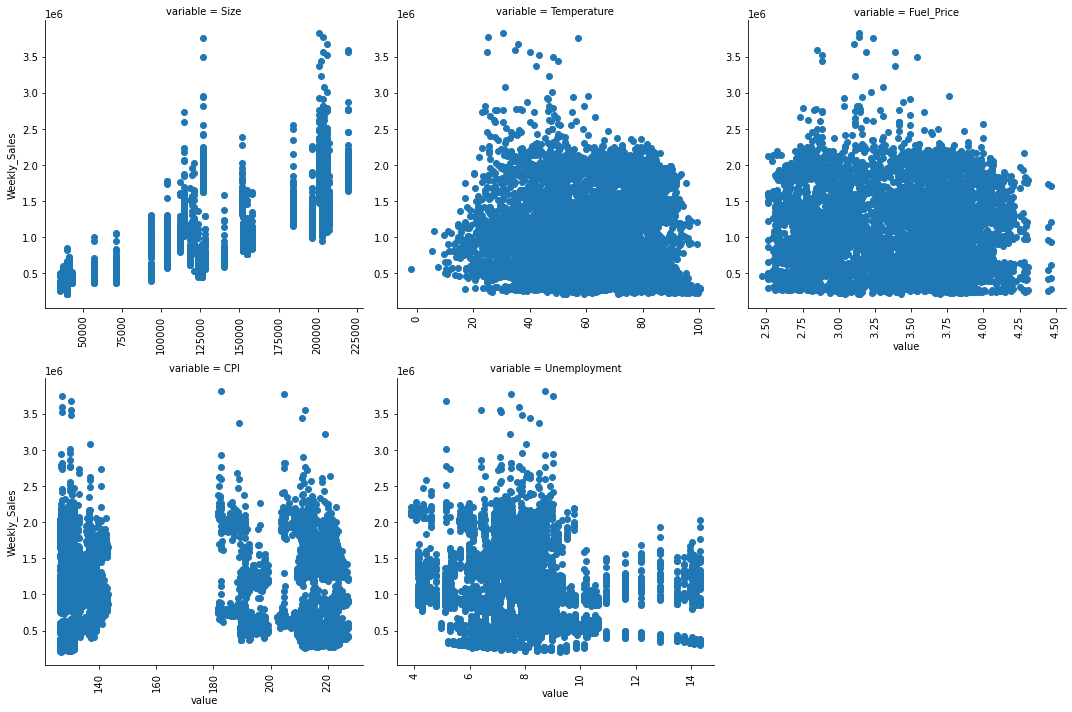

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
conti_sum = pd.DataFrame(df_train.groupby(continuous).Weekly_Sales.sum().reset_index())
def pairplots(x, y, **kwargs):
    ax = plt.gca()
    ax.scatter(x=x, y=y)
    plt.xticks(rotation=90)

f_conti = pd.melt(conti_sum, id_vars=['Weekly_Sales'], value_vars=continuous)
g = sns.FacetGrid(f_conti, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(pairplots, "value", "Weekly_Sales")

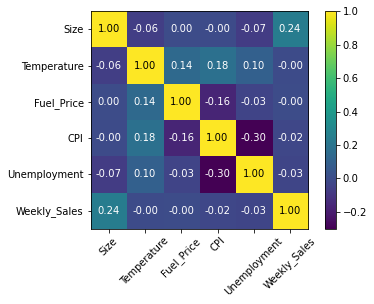

In [18]:
import numpy as np
from mlxtend.plotting import heatmap
target = ["Weekly_Sales"]
cm = np.corrcoef(df_train[continuous + target].values.T)
hm = heatmap(cm,
              row_names=df_train[continuous + target].columns,
              column_names=df_train[continuous + target].columns)
plt.show()

looking at the scatter plots and the heatmap there is no correlation between weekly_sales and Temperature, Fuel Price, CPI and Unemployment so we will drop those features from the data set as they will not be useful for our model. 
Size on the other hand has a weak positive correlation with our target variable weekly_sales and will be kept as a feature

In [19]:
df_train.drop(columns=["CPI", "Unemployment", "Fuel_Price", "Temperature"], inplace=True)
df_test.drop(columns=["CPI", "Unemployment", "Fuel_Price", "Temperature"], inplace=True)

### Analyzing Discrete Data

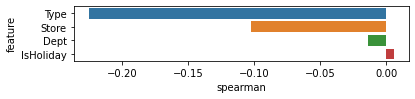

In [20]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['Weekly_Sales'], 'spearman') for f in features] #the default method for df.corr() is pearson. The method used 
                                                                                       #here is "spearman", One could also use "Kendall"
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = discrete
spearman(df_train, features)

The feature Type has the highest correlation with the target variable weekly_sales followed by Store, Dept and then IsHoliday. Although it is possible that the correlation results are skewed because while Store and Dept are categorical data they are expressen in integers. In addition, they are not ordinal, meaning the integers are assigned at random and not in relation to their impact on our target variable weekly_sales. IsHoliday correlation is underestimated because we have very few instances with where IsHoliday is true so we can assume that the correlation between IsHoliday and weekly_sales is higher that 0,01.

In order to assess the impact of Store and Type on the weekly_sales let's encode them based on their rank in weekly_sales performance

In [21]:
df_store = pd.DataFrame(df_train.groupby("Store").Weekly_Sales.mean().reset_index().sort_values(by="Weekly_Sales"))
order_store = np.arange(1,46)
df_store["order_store"] = order_store
dict_store = pd.Series(df_store.order_store.values,index=df_store.Store).to_dict()
df_dept = pd.DataFrame(df_train.groupby("Dept").Weekly_Sales.mean().reset_index().sort_values(by="Weekly_Sales"))
order_dept = np.arange(1,82)
df_dept["order_dept"] = order_dept
dict_dept = pd.Series(df_dept.order_dept.values,index=df_dept.Dept).to_dict()
df_train.replace({"Store": dict_store}, inplace=True)
df_train.replace({"Dept": dict_dept}, inplace=True)
df_test.replace({"Store": dict_store}, inplace=True)
df_test.replace({"Dept": dict_dept}, inplace=True)

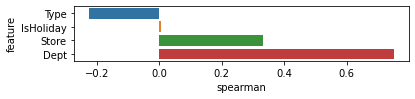

In [22]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['Weekly_Sales'], 'spearman') for f in features] #the default method for df.corr() is pearson. The method used 
                                                                                       #here is "spearman", One could also use "Kendall"
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = discrete
spearman(df_train, features)

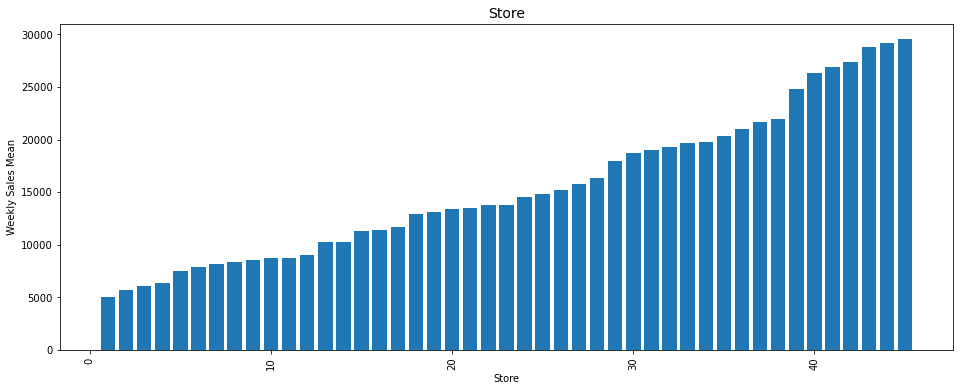

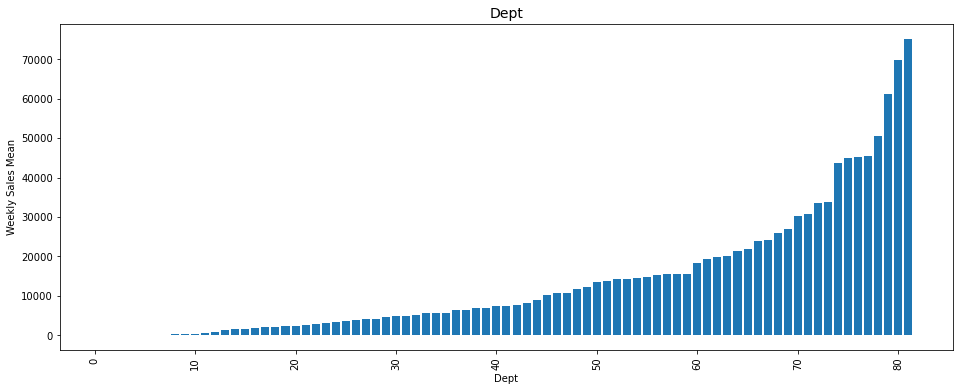

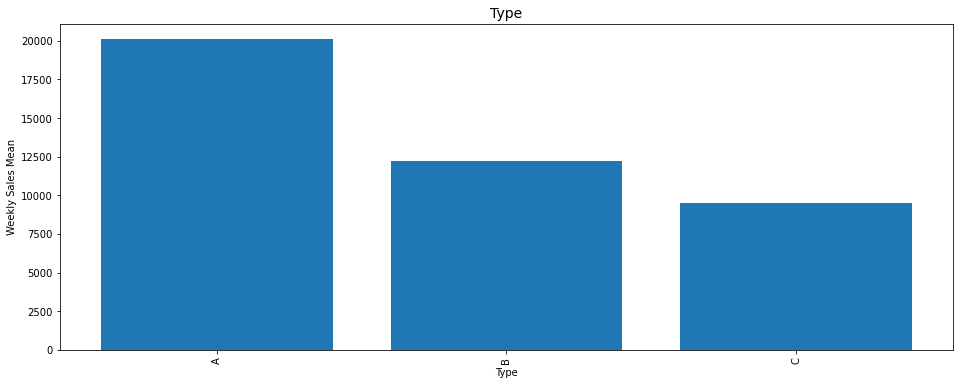

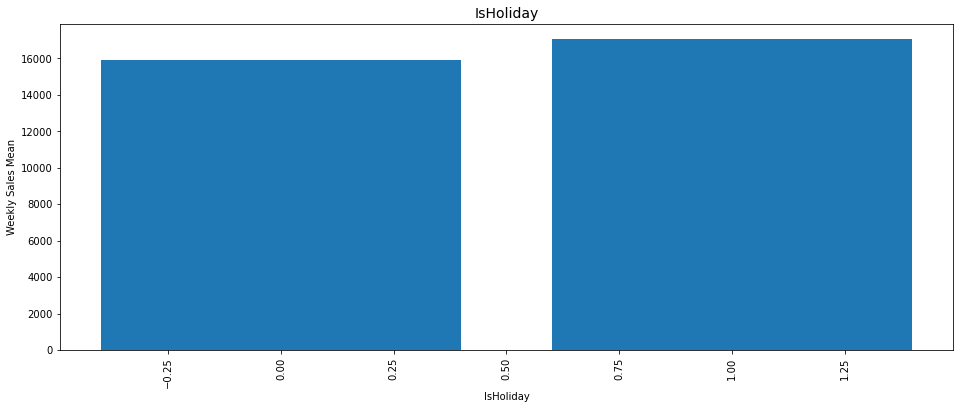

In [23]:
for d in discrete:
    df = pd.DataFrame(df_train.groupby(d).Weekly_Sales.mean().reset_index().sort_values(by="Weekly_Sales", ascending=False))
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot()
    plt.xticks(rotation=90)
    ax.bar(df[d], df["Weekly_Sales"])
    ax.set_title(d, fontsize = 14)
    ax.set_xlabel(d) 
    ax.set_ylabel("Weekly Sales Mean")

After encoding Store and Dept as ordinal categories based on their impact on weekly_sales we can clearly see the high correlation between those features and our target variable. All discrete features will be considered for our model

However we need to transform the string categories (Type and IsHoliday) into numerical before loading them into our model. Both categories are ordinal so we need to encode them as such 

In [24]:
df_train.Type = df_train.Type.apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
df_test.Type = df_test.Type.apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
df_train = df_train.replace(False, 0)
df_train = df_train.replace(True, 1)
df_train = df_train.astype({"IsHoliday":"int"})
df_test = df_test.replace(False, 0)
df_test = df_test.replace(True, 1)
df_test = df_test.astype({"IsHoliday":"int"})

### Analyzing Datetime Data

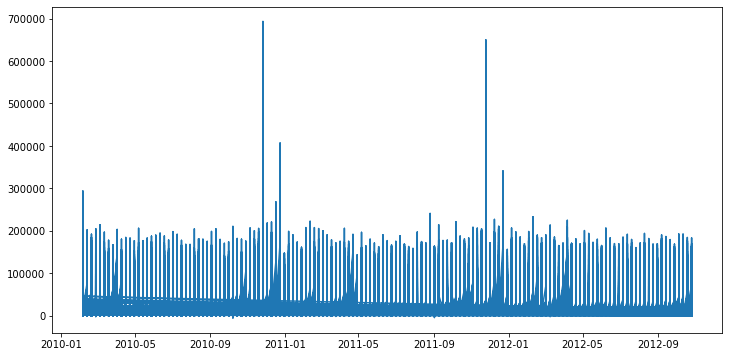

In [25]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.plot(df_train["Date"], df_train["Weekly_Sales"])

It looks like the sales performance is cyclical peaking every year around thanksgiving and Christmas holiday and seems like overall the sales are decreasing year on year. So more important that the date is the calendar week and teh year. We will add 2 features "year" and "week" to our dataframe to be used in our model

In [26]:
df_train['Week'] = df_train['Date'].dt.isocalendar().week
df_train['Year'] = df_train['Date'].dt.isocalendar().year
df_test['Week'] = df_test['Date'].dt.isocalendar().week
df_test['Year'] = df_test['Date'].dt.isocalendar().year

in order to include the variables week and year in our model we need to convert them from datetime to integer

In [27]:
df_train = df_train.astype({"Week":"int", "Year":"int"})
df_test = df_test.astype({"Week":"int", "Year":"int"})

In [28]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Week,Year
0,37,61,2010-02-05,24924.50,0,3,151315,5,2010
1,37,74,2010-02-05,50605.27,0,3,151315,5,2010
2,37,48,2010-02-05,13740.12,0,3,151315,5,2010
3,37,68,2010-02-05,39954.04,0,3,151315,5,2010
4,37,64,2010-02-05,32229.38,0,3,151315,5,2010


## 5-Model Deployment 

### feature selection and preprocessing 

We will first split df_train between train and test data using the train_test_split method. Usually the splitting ratio should be higher than 50/50 but in this case our first aim is to compare models to see which one is the most effetive so 50/50 should be enough to compare.  

We will also need to standardize the features using the standardscaler() method before fitting the data. 

We will compare the follwing 4 regression models and choose the most accurate:

- Lasso 
- Ridge 
- SGD Regressor
- Random Forest Regressor

In [29]:
# splitting the data into test and train 

from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['Weekly_Sales','Date'])
y = df_train['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [31]:
sc.transform(X_train)
sc.transform(X_test);

In [32]:
from sklearn import linear_model
lasso = linear_model.Lasso()
from sklearn.linear_model import Ridge
ridge = Ridge()
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [33]:
models = [lasso, ridge, sgd, forest ]

In [34]:
def get_name(list_):
    name =[x for x in globals() if globals()[x] is list_][0]
    return name

In [35]:
for model in models:
    model.fit(X_train, y_train)
    print(get_name(model), "done")

lasso done
ridge done
sgd done
forest done


In [36]:
y_hat_sgd = sgd.predict(X_test)
y_hat_lasso = lasso.predict(X_test)
y_hat_ridge = ridge.predict(X_test)
y_hat_forest = forest.predict(X_test)

In [37]:
predictions = [y_hat_lasso, y_hat_sgd, y_hat_ridge, y_hat_forest]

In [38]:
from sklearn.metrics import mean_absolute_error
for prediction in predictions:
    print (get_name(prediction), "MAE: ", mean_absolute_error(y_test, prediction))

y_hat_lasso MAE:  10205.643552448311
y_hat_sgd MAE:  1.0616413112128046e+18
y_hat_ridge MAE:  10205.795048248761
y_hat_forest MAE:  1460.9883807121003


##### Random Forest Regressor is the obvious winner so we will be using it for our submission on kaggle

In [39]:
X_hat = df_test.drop(columns=['Date'])
sc.fit(X)
sc.transform(X)
sc.transform(X_hat)
forest.fit(X,y)
y_hat = forest.predict(X_hat)

To be able to make the submission, we need to append the test data set with the y_hat results and reverse the dictionary for the Store and Dept back to the original codes so that the submission can be evaluated by the kaggle evaluation algorithm.

In [40]:
df_test.insert(8, "Weekly_Sales", y_hat)

In [41]:
inv_dict_store = {v: k for k, v in dict_store.items()}
inv_dict_dept = {v: k for k, v in dict_dept.items()}
df_test.replace({"Store": inv_dict_store}, inplace=True)
df_test.replace({"Dept": inv_dict_dept}, inplace=True)

In [42]:
submission = df_test.loc[:, ["Store", "Dept", "Date", "Weekly_Sales"]]
submission = submission.astype({"Date":"str"})
submission = submission.sort_values(by=["Store", "Dept", "Date"])
submission["Id"] = submission['Store'].map(str) + '_' + submission['Dept'].map(str) + '_' + submission['Date'].map(str)
my_submission = submission.drop(columns=["Store", "Dept", "Date"])
my_submission = my_submission[["Id", "Weekly_Sales"]]
my_submission.sort_values(by="Id", ascending=False)
my_submission = my_submission.astype({"Weekly_Sales":"int"})
my_submission.to_csv('my_submission.csv', index=False)
my_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,33420
71,1_1_2012-11-09,20006
142,1_1_2012-11-16,19131
213,1_1_2012-11-23,22055
285,1_1_2012-11-30,25331
...,...,...
114798,45_98_2013-06-28,675
114863,45_98_2013-07-05,672
114930,45_98_2013-07-12,704
114997,45_98_2013-07-19,794


# 6- Model evaluation and conclusion

the submission reached a score of 2786 on Kaggle which is in the top 8% (rank 47). 

This was reached using the default sklearn setting for RandomForestRegressor. Further improvements can be achieved by tuning the hyperparameters via Random and CVGridSearch 